# Predicting Heart Disease in Patients Using Machine Learning

This notebook looks into using various Python-based ML & Data Science libraries and tools in an attempt to build an ML model capable of prediciting whether or not the patient has heart disease based on their medical information.

## Approach
1. Problem definition
2. Data
3. Evaluation
4. Data features
5. Modelling
6. Experimentation

## 1. Problem Definition
> Given the medical information of a given patient, can we accurately predict whether or not they have heart disease ?

## 2. Data
> I will be using the ***UCI Heart Disease*** dataset  
> Retrieved from https://archive.ics.uci.edu/ml/datasets/heart+disease

## 3. Evaluation
> if we can reach 95% accuracy at predicting whether or not a patient has heart disease, we'll further pursue this project.

## 4. Features
Description of the feature data used in the dataset  

**Data dictionary**
1. (age): age in years
2. (sex): sex (1 = male; 0 = female)
3. (cp):chest pain type
    - Value 1: typical angina
    - Value 2: atypical angina
    - Value 3: non-anginal pain
    - Value 4: asymptomatic
4. (trestbps): resting blood pressure (in mm Hg on admission to the hospital)
5. (chol): serum cholestoral in mg/dl
6. (fbs): (fasting blood sugar > 120 mg/dl)  (1 = true; 0 = false)
7. (restecg):resting electrocardiographic results
    - Value 0: normal
    - Value 1: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV)
    - Value 2: showing probable or definite left ventricular hypertrophy
                    by Estes' criteria
8. (thalach): maximum heart rate achieved
9. (exang): exercise induced angina (1 = yes; 0 = no)
10. (oldpeak): ST depression induced by exercise relative to rest
11. (slope): the slope of the peak exercise ST segment
    - Value 1: upsloping
    - Value 2: flat
    - Value 3: downsloping
12. (ca): number of major vessels (0-3) colored by flourosopy
13. (thal): 3 = normal; 6 = fixed defect; 7 = reversable defect
14. (num) (the predicted attribute)


## The Tools
I will be using pandas, sklearn, Matplotlib & NumPy for the data analysis and manipulation

In [4]:
# Installing the Seaborn Python package within jupyter
import sys
!conda install --yes --prefix {sys.prefix} seaborn

Solving environment: done


==> WARNING: A newer version of conda exists. <==
  current version: 4.9.2
  latest version: 4.10.1

Please update conda by running

    $ conda update -n base -c defaults conda



## Package Plan ##

  environment location: /Users/JJ/Desktop/MLProjects/Heart_Disease_Project/env

  added / updated specs:
    - seaborn


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    ca-certificates-2021.4.13  |       hecd8cb5_1         114 KB
    ------------------------------------------------------------
                                           Total:         114 KB

The following packages will be UPDATED:

  ca-certificates                      2021.1.19-hecd8cb5_1 --> 2021.4.13-hecd8cb5_1
  openssl                                 1.1.1j-h9ed2024_0 --> 1.1.1k-h9ed2024_0



ca-certificates-2021 | 114 KB    | ##################################### | 100% 
Preparing transact

In [5]:
# Importing all the tools needed

# Regular EDA (exploratory data analysis) and plotting libs
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Models from SKlearn
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

#Model Evaluation
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import plot_roc_curve

## Loading and Viewing the data

In [6]:
data  = pd.read_csv("data/heart-disease.csv")
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [7]:
data.shape

(303, 14)

## Data exploration
The goal here is to find put more about the data and become a subject matter expert on the dataset you're working with.  
1. What question(s) are we trying to solve ?
2. What kind of data do we have and how do we treat the different types ?
3. What's missing from the data and how do we deal with it ?
4. Are there any data point outliers and how do we deal with them ?
5. How can we add , change or remove features to get more out of the data ?


In [8]:
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [9]:
data.tail()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0
302,57,0,1,130,236,0,0,174,0,0.0,1,1,2,0


In [10]:
# Revealing more information on the target class
# Determining if the set is balanced or imbalances
data.target.value_counts()

1    165
0    138
Name: target, dtype: int64

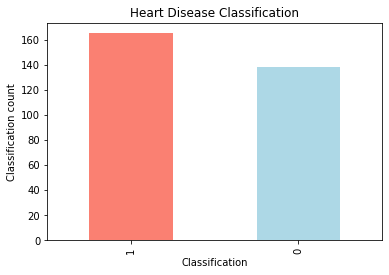

In [11]:
# Plot the target data to be a little bit more descriptive
data.target.value_counts().plot(kind="bar", color=["salmon", "lightblue"], title = "Heart Disease Classification", xlabel="Classification", ylabel="Classification count");

In [12]:
# Information on the dataframe
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [13]:
#Check for missing values
data.isna().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [14]:
#Describing the data in the dataframe
data.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


## Finding Patterns in the Features
- Getting an intuition of the patterns in the data.  
- Understanding the data adn gaining some expert knowledge to infer a little more about the data

## Comparing features (Independent variables) to the Target Variable
### Heart Disease Frequency across the Sexes

In [15]:
data.sex.value_counts()

1    207
0     96
Name: sex, dtype: int64

In [16]:
#Compare the target column with the sex column
pd.crosstab(data.target, data.sex)

sex,0,1
target,,
0,24,114
1,72,93


The data above reveals that :-
1. 7 out of 10 female patients may have heart disease
2. 5 out 10 male patients may have heart disease
3. 5.5 out of 10 patients brought in may have heart disease

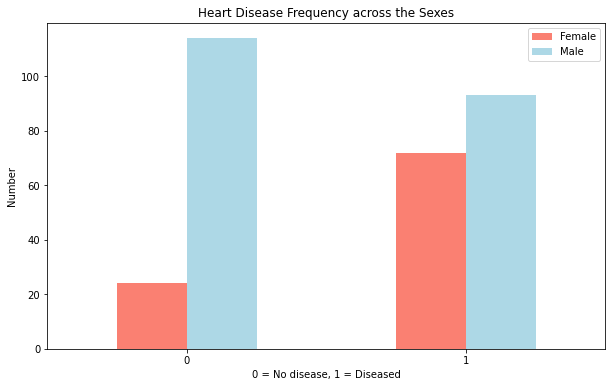

In [17]:
#Create a plot of the crosstab
pd.crosstab(data.target, data.sex).plot(kind="bar", figsize=(10,6), color=["salmon", "lightblue"], title="Heart Disease Frequency across the Sexes");
plt.xlabel("0 = No disease, 1 = Diseased")
plt.ylabel("Number")
plt.legend(["Female", "Male"]);
plt.xticks(rotation=0);

### Age vs Max Heart Rate

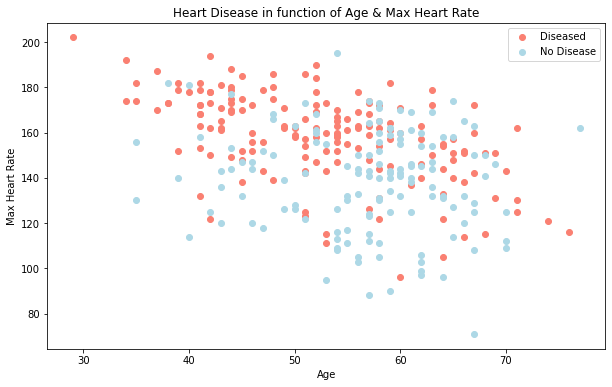

In [18]:
# Create another figure
plt.figure(figsize=(10,6))

# Scatter plot with recorded heart disease
plt.scatter(data.age[data.target==1],
           data.thalach[data.target==1],
            c="salmon")

# Scatter where heart disease was not recorded
plt.scatter(data.age[data.target==0],
           data.thalach[data.target==0],
            c="lightblue");

#Add some helpful info
plt.title("Heart Disease in function of Age & Max Heart Rate")
plt.xlabel("Age")
plt.ylabel("Max Heart Rate")
plt.legend(["Diseased", "No Disease"]);

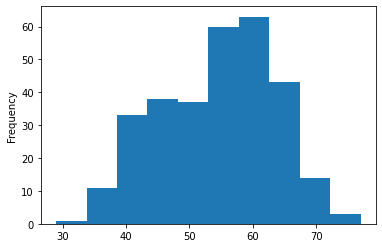

In [19]:
# Check the distribution of the age column
data.age.plot.hist();

### Heart Disease Frequency over Chest Pain Type  
* (cp):chest pain type
    - Value 0: typical angina
    - Value 1: atypical angina
    - Value 2: non-anginal pain
    - Value 3: asymptomatic

In [20]:
pd.crosstab(data.cp, data.target)

target,0,1
cp,,
0,104,39
1,9,41
2,18,69
3,7,16


We see that:-
- Non-anginal chest pain is a good indicator for heart disease
- Typical angina is a poor indicator for heart disease

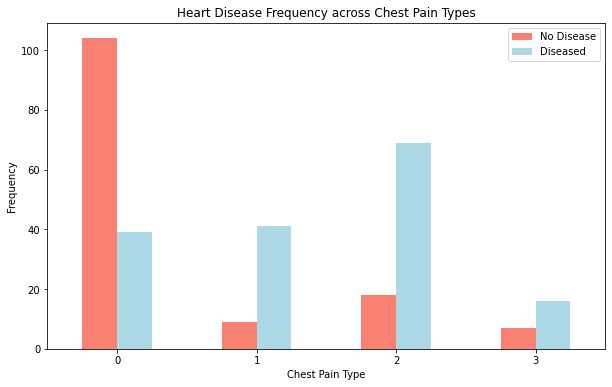

In [21]:
# Making the crosstab more descriptive
pd.crosstab(data.cp, data.target).plot(kind="bar", figsize=(10, 6), color=["salmon", "lightblue"]);

plt.title("Heart Disease Frequency across Chest Pain Types")
plt.xlabel("Chest Pain Type")
plt.ylabel("Frequency")
plt.legend(["No Disease", "Diseased"])
plt.xticks(rotation=0);

## Building a Correlation Matrix
- Tells us how each of the independent variables (features) are related to each other

In [22]:
# Make a correlation matrix
data.corr()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
age,1.000000,-0.098447,-0.068653,0.279351,0.213678,0.121308,-0.116211,-0.398522,0.096801,0.210013,-0.168814,0.276326,0.068001,-0.225439
sex,-0.098447,1.000000,-0.049353,-0.056769,-0.197912,0.045032,-0.058196,-0.044020,0.141664,0.096093,-0.030711,0.118261,0.210041,-0.280937
cp,-0.068653,-0.049353,1.000000,0.047608,-0.076904,0.094444,0.044421,0.295762,-0.394280,-0.149230,0.119717,-0.181053,-0.161736,0.433798
trestbps,0.279351,-0.056769,0.047608,1.000000,0.123174,0.177531,-0.114103,-0.046698,0.067616,0.193216,-0.121475,0.101389,0.062210,-0.144931
chol,0.213678,-0.197912,-0.076904,0.123174,1.000000,0.013294,-0.151040,-0.009940,0.067023,0.053952,-0.004038,0.070511,0.098803,-0.085239
fbs,0.121308,0.045032,0.094444,0.177531,0.013294,1.000000,-0.084189,-0.008567,0.025665,0.005747,-0.059894,0.137979,-0.032019,-0.028046
restecg,-0.116211,-0.058196,0.044421,-0.114103,-0.151040,-0.084189,1.000000,0.044123,-0.070733,-0.058770,0.093045,-0.072042,-0.011981,0.137230
thalach,-0.398522,-0.044020,0.295762,-0.046698,-0.009940,-0.008567,0.044123,1.000000,-0.378812,-0.344187,0.386784,-0.213177,-0.096439,0.421741
exang,0.096801,0.141664,-0.394280,0.067616,0.067023,0.025665,-0.070733,-0.378812,1.000000,0.288223,-0.257748,0.115739,0.206754,-0.436757
oldpeak,0.210013,0.096093,-0.149230,0.193216,0.053952,0.005747,-0.058770,-0.344187,0.288223,1.000000,-0.577537,0.222682,0.210244,-0.430696


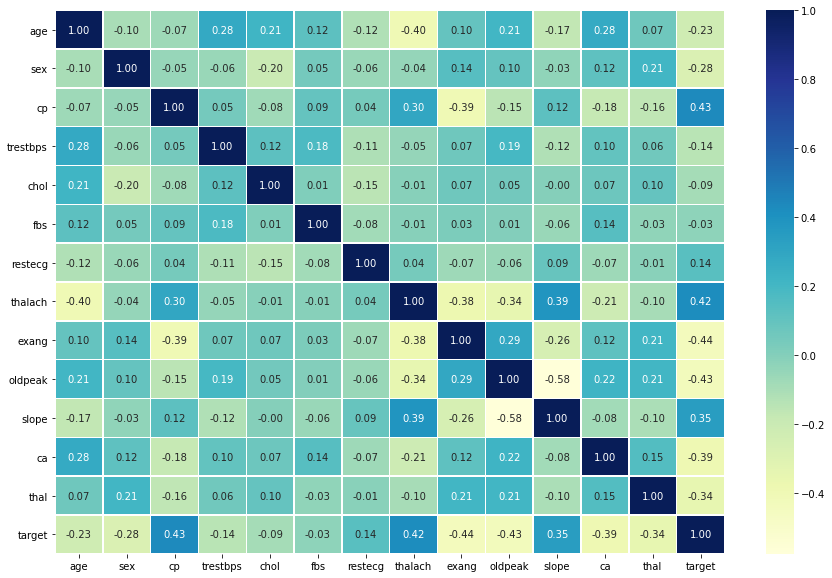

In [23]:
#Let's make our correlation matrix a little more descriptive
corr_matrix = data.corr()
fig, ax = plt.subplots(figsize=(15,10))
ax = sns.heatmap(corr_matrix,
                annot=True,
                linewidths=0.5,
                fmt=".2f",
                cmap="YlGnBu");

Positive value - positive correlation -> as a increases so does b & vice versa  

Negative value - negative correlation -> as a increases , b decreases & vice versa

## 5. MODELLING

In [24]:
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [25]:
# Split data into X and y 
X = data.drop("target", axis=1)
y = data.target

In [26]:
X.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2


In [27]:
y.head()

0    1
1    1
2    1
3    1
4    1
Name: target, dtype: int64

In [28]:
# Creating train , validation and test sets
np.random.seed(42)

# Split into train and test set
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2)

In [29]:
# Visuaizing the training data
X_train.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
132,42,1,1,120,295,0,1,162,0,0.0,2,0,2
202,58,1,0,150,270,0,0,111,1,0.8,2,0,3
196,46,1,2,150,231,0,1,147,0,3.6,1,0,2
75,55,0,1,135,250,0,0,161,0,1.4,1,0,2
176,60,1,0,117,230,1,1,160,1,1.4,2,2,3


In [30]:
y_train.head()

132    1
202    0
196    0
75     1
176    0
Name: target, dtype: int64

### Building the model
**What model do we use ?**  

We will try the following 5 different models/estimators
1. KNegihbours Classifier
2. Random Forest classifier
3. Logistic Regressor
4. XGBoost Classifier
5. CatBoost Classifier



In [31]:
import xgboost
from xgboost import XGBClassifier
import catboost
from catboost import CatBoostClassifier

In [32]:
# Put models into a dictionary
models = {"Logistic Regression": LogisticRegression(),
         "KNN": KNeighborsClassifier(),
         "Random Forest": RandomForestClassifier(),
         "XGBoost Classifier": XGBClassifier(),
         "CatBoost Classifier": CatBoostClassifier()}

# Create a function to fit and score models
def fit_and_score(models, X_train, X_test, y_train, y_test):
    """
    Fits and evaluates given ML models.
    models: a dict of the different SKLEARN ML models that will be used
    X_train: training data
    X_test" testing data
    y_train: training labels
    y_test: testing labels
    
    """
    # Set random seed
    np.random.seed(42)
    # Make a dictionary to keep model scores
    model_scores = {}
    # Looping through the models
    for name, model in models.items():
        # Fitting/training each model to the training data
        model.fit(X_train, y_train)
        #Evaluate model and append its score to model_score dict
        model_scores[name] = model.score(X_test, y_test)
    return model_scores        

In [33]:
# Fitting and evaluating each of the models
# These are the baseline scores
model_scores = fit_and_score(models, X_train, X_test, y_train, y_test)
model_scores

/Users/JJ/Desktop/MLProjects/Heart_Disease_Project/env/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/JJ/Desktop/MLProjects/Heart_Disease_Project/env/lib/python3.8/site-packages/xgboost/sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.w

[13:47:01] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Learning rate set to 0.005621


/Users/JJ/Desktop/MLProjects/Heart_Disease_Project/env/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


0:	learn: 0.6884219	total: 71.4ms	remaining: 1m 11s
1:	learn: 0.6846992	total: 73.6ms	remaining: 36.7s
2:	learn: 0.6804482	total: 75.1ms	remaining: 25s
3:	learn: 0.6762280	total: 76.4ms	remaining: 19s
4:	learn: 0.6716854	total: 77.5ms	remaining: 15.4s
5:	learn: 0.6672902	total: 78.5ms	remaining: 13s
6:	learn: 0.6640072	total: 79.6ms	remaining: 11.3s
7:	learn: 0.6602127	total: 80.8ms	remaining: 10s
8:	learn: 0.6563948	total: 82.1ms	remaining: 9.04s
9:	learn: 0.6525316	total: 83.7ms	remaining: 8.29s
10:	learn: 0.6483925	total: 85.2ms	remaining: 7.66s
11:	learn: 0.6449119	total: 86.5ms	remaining: 7.12s
12:	learn: 0.6413090	total: 87.6ms	remaining: 6.65s
13:	learn: 0.6374641	total: 88.8ms	remaining: 6.25s
14:	learn: 0.6335822	total: 89.9ms	remaining: 5.9s
15:	learn: 0.6288496	total: 90.9ms	remaining: 5.59s
16:	learn: 0.6250951	total: 92ms	remaining: 5.32s
17:	learn: 0.6209988	total: 93.1ms	remaining: 5.08s
18:	learn: 0.6182407	total: 94.2ms	remaining: 4.86s
19:	learn: 0.6146885	total: 95.2

261:	learn: 0.2825288	total: 380ms	remaining: 1.07s
262:	learn: 0.2819432	total: 381ms	remaining: 1.07s
263:	learn: 0.2813131	total: 382ms	remaining: 1.07s
264:	learn: 0.2806125	total: 384ms	remaining: 1.06s
265:	learn: 0.2800353	total: 385ms	remaining: 1.06s
266:	learn: 0.2792874	total: 386ms	remaining: 1.06s
267:	learn: 0.2787927	total: 387ms	remaining: 1.06s
268:	learn: 0.2780463	total: 388ms	remaining: 1.05s
269:	learn: 0.2773433	total: 389ms	remaining: 1.05s
270:	learn: 0.2768860	total: 390ms	remaining: 1.05s
271:	learn: 0.2765006	total: 391ms	remaining: 1.05s
272:	learn: 0.2760610	total: 392ms	remaining: 1.04s
273:	learn: 0.2757626	total: 393ms	remaining: 1.04s
274:	learn: 0.2754302	total: 394ms	remaining: 1.04s
275:	learn: 0.2748640	total: 396ms	remaining: 1.04s
276:	learn: 0.2746047	total: 396ms	remaining: 1.03s
277:	learn: 0.2739447	total: 398ms	remaining: 1.03s
278:	learn: 0.2734597	total: 400ms	remaining: 1.03s
279:	learn: 0.2728541	total: 401ms	remaining: 1.03s
280:	learn: 

532:	learn: 0.1854109	total: 705ms	remaining: 617ms
533:	learn: 0.1849044	total: 706ms	remaining: 616ms
534:	learn: 0.1847475	total: 708ms	remaining: 615ms
535:	learn: 0.1845546	total: 709ms	remaining: 613ms
536:	learn: 0.1842422	total: 710ms	remaining: 612ms
537:	learn: 0.1841026	total: 710ms	remaining: 610ms
538:	learn: 0.1838421	total: 712ms	remaining: 609ms
539:	learn: 0.1833711	total: 712ms	remaining: 607ms
540:	learn: 0.1830110	total: 713ms	remaining: 605ms
541:	learn: 0.1828300	total: 714ms	remaining: 604ms
542:	learn: 0.1825824	total: 716ms	remaining: 602ms
543:	learn: 0.1824889	total: 717ms	remaining: 601ms
544:	learn: 0.1821247	total: 721ms	remaining: 602ms
545:	learn: 0.1818624	total: 724ms	remaining: 602ms
546:	learn: 0.1815900	total: 725ms	remaining: 600ms
547:	learn: 0.1813913	total: 727ms	remaining: 600ms
548:	learn: 0.1811233	total: 733ms	remaining: 602ms
549:	learn: 0.1807960	total: 737ms	remaining: 603ms
550:	learn: 0.1804474	total: 742ms	remaining: 605ms
551:	learn: 

824:	learn: 0.1289933	total: 1.03s	remaining: 219ms
825:	learn: 0.1288743	total: 1.03s	remaining: 217ms
826:	learn: 0.1287744	total: 1.03s	remaining: 216ms
827:	learn: 0.1287104	total: 1.03s	remaining: 215ms
828:	learn: 0.1285398	total: 1.04s	remaining: 216ms
829:	learn: 0.1283956	total: 1.05s	remaining: 214ms
830:	learn: 0.1283173	total: 1.05s	remaining: 213ms
831:	learn: 0.1281398	total: 1.05s	remaining: 212ms
832:	learn: 0.1279183	total: 1.05s	remaining: 211ms
833:	learn: 0.1277190	total: 1.05s	remaining: 210ms
834:	learn: 0.1275274	total: 1.06s	remaining: 209ms
835:	learn: 0.1274047	total: 1.06s	remaining: 208ms
836:	learn: 0.1273229	total: 1.06s	remaining: 207ms
837:	learn: 0.1270773	total: 1.06s	remaining: 206ms
838:	learn: 0.1269880	total: 1.06s	remaining: 204ms
839:	learn: 0.1268490	total: 1.07s	remaining: 203ms
840:	learn: 0.1267795	total: 1.07s	remaining: 202ms
841:	learn: 0.1266015	total: 1.07s	remaining: 201ms
842:	learn: 0.1263748	total: 1.07s	remaining: 199ms
843:	learn: 

{'Logistic Regression': 0.8852459016393442,
 'KNN': 0.6885245901639344,
 'Random Forest': 0.8360655737704918,
 'XGBoost Classifier': 0.819672131147541,
 'CatBoost Classifier': 0.8360655737704918}

### The vanilla Logistic Regression model performs the best.

### Model Comparison Visualization

In [34]:
# Dataframe way
model_comparison = pd.DataFrame(model_scores, index = ["Model Accuracy"])
model_comparison

,Logistic Regression,KNN,Random Forest,XGBoost Classifier,CatBoost Classifier
Model Accuracy,0.885246,0.688525,0.836066,0.819672,0.836066


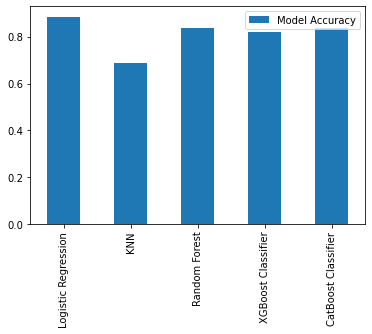

In [35]:
# Bar plot
model_comparison.T.plot.bar();

### `Since none of the models achieved 95% accuracy , I proceeded to tune the models' hyperparameters.`

## 5.1 Tuning the ML Models
### Improving the baseline models -> Hyperparameter tuning


### 5.1.1 HyperParameter Tuning
### Tuning the KNN Model
How to tune a KNN model :
1. n_neighbours -> default = 5
2. Normalizing the data between 0 and 1

In [36]:
# Let's tune the KNN

# Dictionaries that will hold the score information
train_scores = {}
test_scores = {}

#Create a list of different values of neighbours
neighbors = range(1,12)

#Setup the KNN instance
knn = KNeighborsClassifier()

#Loop through different n_neighbours
for i in neighbors:
    # Change knn neighbour params
    knn.set_params(n_neighbors=i)
    
    #Fit the algorithm
    knn.fit(X_train, y_train)
    
    #Update the training scores dict
    train_scores[i] = knn.score(X_train, y_train)
    # Update the test scores dict
    test_scores[i] = knn.score(X_test, y_test)

In [37]:
# Visualize training scores for number of neighbours
train_scores

{1: 1.0,
 2: 0.8099173553719008,
 3: 0.7727272727272727,
 4: 0.743801652892562,
 5: 0.7603305785123967,
 6: 0.7520661157024794,
 7: 0.743801652892562,
 8: 0.7231404958677686,
 9: 0.71900826446281,
 10: 0.6942148760330579,
 11: 0.7272727272727273}

In [38]:
# Visualize testing scores for number of neighbours
test_scores

{1: 0.6229508196721312,
 2: 0.639344262295082,
 3: 0.6557377049180327,
 4: 0.6721311475409836,
 5: 0.6885245901639344,
 6: 0.7213114754098361,
 7: 0.7049180327868853,
 8: 0.6885245901639344,
 9: 0.6885245901639344,
 10: 0.7049180327868853,
 11: 0.7540983606557377}

In [39]:
# Plotting the neighbour variable train and test scores
train_score_summary = pd.DataFrame(train_scores, index = ["Training Accuracy"])
test_score_summary = pd.DataFrame(test_scores, index = ["Testing Accuracy"])

Text(0, 0.5, 'Model Score')

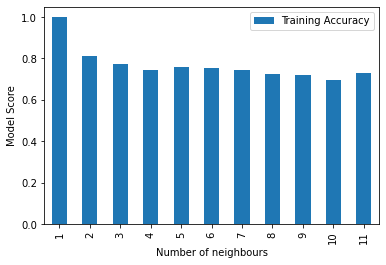

In [40]:
train_score_summary.T.plot.bar();
plt.xlabel("Number of neighbours")
plt.ylabel("Model Score")

Text(0, 0.5, 'Model Score')

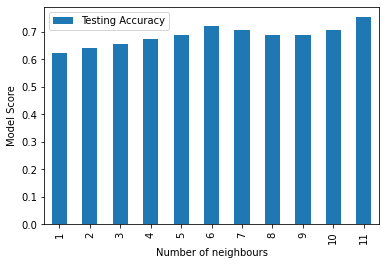

In [41]:
test_score_summary.T.plot.bar();
plt.xlabel("Number of neighbours")
plt.ylabel("Model Score")

Max KNN test score: 75.41%


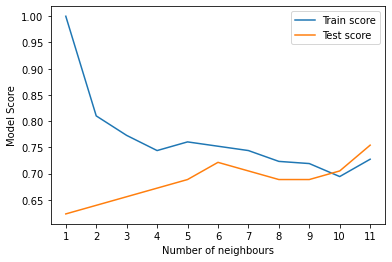

In [42]:
# Line plot
plt.plot(neighbors, train_scores.values(), label="Train score")
plt.plot(neighbors, test_scores.values(), label="Test score")
plt.xticks(np.arange(1,12,1))
plt.xlabel("Number of neighbours")
plt.ylabel("Model Score")
plt.legend();
print(f"Max KNN test score: {max(test_scores.values())*100:.2f}%")

**KNN Model's accuracy is still quite low.**  
**I simply eliminated the KNeighbours Classifier model from the analysis moving forward.**

### Tuning the LogisticRegression & RandomForestClassifier using RandomizedSearchCV

In [43]:
# Create a hyperparam grid for LogisticRegression
log_reg_grid = {"C": np.logspace(-4, 4, 20),
               "solver": ["liblinear"]}

# Create a hyperparam grid for RandomForestClassifier
rfc_grid = {"n_estimators": np.arange(10,1000,50),
           "max_depth": [None, 3, 5, 10],
           "min_samples_split": np.arange(2, 20, 2),
           "min_samples_leaf": np.arange(1, 20, 2)}

In [44]:
# Tune both models using RandomizedSearchCV
np.random.seed(42)

# LogisticRegression RSCV setup
rs_logreg = RandomizedSearchCV(LogisticRegression(),
                              param_distributions = log_reg_grid,
                              cv=5,
                              n_iter = 20,
                              verbose = True)
# Fit LogReg model
rs_logreg.fit(X_train, y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


RandomizedSearchCV(cv=5, estimator=LogisticRegression(), n_iter=20,
                   param_distributions={'C': array([1.00000000e-04, 2.63665090e-04, 6.95192796e-04, 1.83298071e-03,
       4.83293024e-03, 1.27427499e-02, 3.35981829e-02, 8.85866790e-02,
       2.33572147e-01, 6.15848211e-01, 1.62377674e+00, 4.28133240e+00,
       1.12883789e+01, 2.97635144e+01, 7.84759970e+01, 2.06913808e+02,
       5.45559478e+02, 1.43844989e+03, 3.79269019e+03, 1.00000000e+04]),
                                        'solver': ['liblinear']},
                   verbose=True)

In [45]:
# Check best LogReg hyperparams
rs_logreg.best_params_

{'solver': 'liblinear', 'C': 0.23357214690901212}

In [46]:
# Check the RSCV LogReg's testing accuracy
rs_logreg.score(X_test, y_test)

0.8852459016393442

In [47]:
# Tune RFC model
np.random.seed(42)

# Setup RSCV RFC model
rs_rfc = RandomizedSearchCV(RandomForestClassifier(),
                           param_distributions = rfc_grid,
                           cv=5,
                           n_iter = 20,
                           verbose = True)

# Fit RSCV RFC model
rs_rfc.fit(X_train, y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(), n_iter=20,
                   param_distributions={'max_depth': [None, 3, 5, 10],
                                        'min_samples_leaf': array([ 1,  3,  5,  7,  9, 11, 13, 15, 17, 19]),
                                        'min_samples_split': array([ 2,  4,  6,  8, 10, 12, 14, 16, 18]),
                                        'n_estimators': array([ 10,  60, 110, 160, 210, 260, 310, 360, 410, 460, 510, 560, 610,
       660, 710, 760, 810, 860, 910, 960])},
                   verbose=True)

In [48]:
# Find best RFC hyperparams
rs_rfc.best_params_

{'n_estimators': 210,
 'min_samples_split': 4,
 'min_samples_leaf': 19,
 'max_depth': 3}

In [49]:
# Check the RSCV RFC's testing accuracy
rs_rfc.score(X_test, y_test)

0.8688524590163934

### The baseline LogisticRegression Model is still the most accurate model at this point.

### I decided to proceed with the LogReg Model only, using GridSearchCV to further improve this model's accuracy.

In [50]:
# Make new hyperparam grid
logreg_grid = {"C": np.logspace(-4, 4, 30),
               "solver": ["liblinear"]}

# Setup grid hyperparameter search for LogReg
gs_logreg = GridSearchCV(LogisticRegression(),
                        param_grid = logreg_grid,
                        cv=5,
                        verbose=True)

# Fit GSCV LogReg Model
gs_logreg.fit(X_train, y_train)

Fitting 5 folds for each of 30 candidates, totalling 150 fits


GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': array([1.00000000e-04, 1.88739182e-04, 3.56224789e-04, 6.72335754e-04,
       1.26896100e-03, 2.39502662e-03, 4.52035366e-03, 8.53167852e-03,
       1.61026203e-02, 3.03919538e-02, 5.73615251e-02, 1.08263673e-01,
       2.04335972e-01, 3.85662042e-01, 7.27895384e-01, 1.37382380e+00,
       2.59294380e+00, 4.89390092e+00, 9.23670857e+00, 1.74332882e+01,
       3.29034456e+01, 6.21016942e+01, 1.17210230e+02, 2.21221629e+02,
       4.17531894e+02, 7.88046282e+02, 1.48735211e+03, 2.80721620e+03,
       5.29831691e+03, 1.00000000e+04]),
                         'solver': ['liblinear']},
             verbose=True)

In [51]:
# Check for the best hyperparams
gs_logreg.best_params_

{'C': 0.20433597178569418, 'solver': 'liblinear'}

In [52]:
# Check the GSCV LogReg's accuracy
gs_logreg.score(X_test, y_test)

0.8852459016393442

### The Grid Search CV and Random Search CV Logistic Regression models matched the Baseline LogReg's accuracy performance.

## 6. Evaluation Metrics Beyond Accuracy
* Determining Feature Importance
* Confusion Matrix.
* Cross-validation
* Multiple Metric scores
* Classification report
* ROC Curve
* Area under the curve (AUC)

In [53]:
# Making predictions with the GSCV LogReg Tuned Model
y_preds = gs_logreg.predict(X_test)
y_preds

array([0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0,
       0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0])

### ROC Curve & AUC 
TPR vs FPR

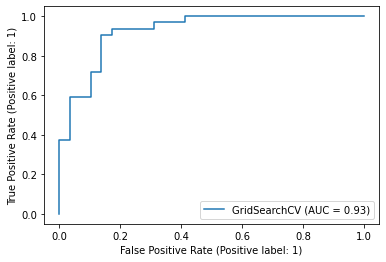

In [54]:
# Create & Plot ROC curve -> and calcaulte AUC Metric
plot_roc_curve(gs_logreg, X_test, y_test);

In [55]:
### Confusion Matrix
print(confusion_matrix(y_test, y_preds))

[[25  4]
 [ 3 29]]


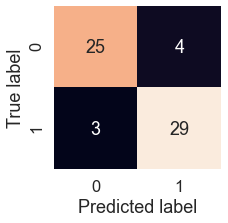

In [56]:
# Improve confusion matrix visualization
sns.set(font_scale=1.5)

def plot_conf_mat(y_test, y_preds):
    fig, ax = plt.subplots(figsize=(3,3))
    ax = sns.heatmap(confusion_matrix(y_test, y_preds),
                    annot=True,
                    cbar=False)
    plt.xlabel("Predicted label")
    plt.ylabel("True label")
    
plot_conf_mat(y_test, y_preds)

### Classification Report & Cross-Validated Metrics


In [57]:
# Classsification report -> Non cross-validated metrics
print(classification_report(y_test, y_preds))

              precision    recall  f1-score   support

           0       0.89      0.86      0.88        29
           1       0.88      0.91      0.89        32

    accuracy                           0.89        61
   macro avg       0.89      0.88      0.88        61
weighted avg       0.89      0.89      0.89        61



## Cross-Validated Metrics (Accuracy, Precision, Recall & F1)

In [58]:
# Checking the best hyperparameters
gs_logreg.best_params_

{'C': 0.20433597178569418, 'solver': 'liblinear'}

In [59]:
# Create new LogReg classifier with best hyperparameters
logreg_clf = LogisticRegression(C=0.20433597178569418, solver='liblinear')

In [60]:
# Use cross_val_score to find cross_validated accuracy
cv_accuracy = cross_val_score(logreg_clf,
                             X,
                             y,
                             cv=5,
                             scoring ="accuracy")
cv_accuracy = np.mean(cv_accuracy)
cv_accuracy

0.8446994535519124

In [61]:
# Use cross_val_score to find cross_validated precision
cv_precision = cross_val_score(logreg_clf,
                             X,
                             y,
                             cv=5,
                             scoring ="precision")
cv_precision = np.mean(cv_precision)
cv_precision

0.8207936507936507

In [62]:
# Use cross_val_score to find cross_validated recall
cv_recall = cross_val_score(logreg_clf,
                             X,
                             y,
                             cv=5,
                             scoring ="recall")
cv_recall = np.mean(cv_recall)
cv_recall

0.9212121212121213

In [63]:
# Use cross_val_score to find cross_validated F1
cv_f1 = cross_val_score(logreg_clf,
                             X,
                             y,
                             cv=5,
                             scoring ="f1")
cv_f1 = np.mean(cv_f1)
cv_f1

0.8673007976269721

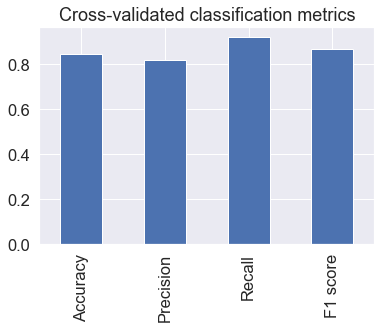

In [64]:
# Visualize cross_validates metrics
cv_metrics = pd.DataFrame({"Accuracy": cv_accuracy,
                          "Precision": cv_precision,
                          "Recall": cv_recall,
                          "F1 score": cv_f1}, index=[0])
cv_metrics.T.plot.bar(title="Cross-validated classification metrics", legend=False);

## Feature Importance
### Which features contributed most to the outcomes of the model and exactly how did they contribute ?  
### Finding feature importance is model dependent -> Differently implemented models use different methods to find the most important features.



**For LogisticRegression we use the `coef_` attribute to find the feature importance**  
**This extracts the multivariable coefficients that define the logistic regression function for each of the feature variables (i.e y = a + b1(X1) + b2(X2) + ...bn(Xn) -> the `bn` coeffcients are what are key here.**

In [65]:
# Using GSCV LogReg Model.....
logreg_clf.fit(X_train, y_train)

# Check coefficients using coef_ attribute
logreg_clf.coef_

array([[ 0.00316727, -0.86044582,  0.66067073, -0.01156993, -0.00166374,
         0.04386131,  0.31275787,  0.02459361, -0.60413038, -0.56862852,
         0.45051617, -0.63609863, -0.67663375]])

In [66]:
# Match coef's of features to columns
feature_dict = dict(zip(data.columns, list(logreg_clf.coef_[0])))
feature_dict

{'age': 0.0031672721856887734,
 'sex': -0.860445816920919,
 'cp': 0.6606707303492849,
 'trestbps': -0.011569930902919925,
 'chol': -0.001663741604035976,
 'fbs': 0.04386130751482091,
 'restecg': 0.3127578715206996,
 'thalach': 0.02459360818122666,
 'exang': -0.6041303799858143,
 'oldpeak': -0.5686285194546157,
 'slope': 0.4505161679452401,
 'ca': -0.6360986316921434,
 'thal': -0.6766337521354281}

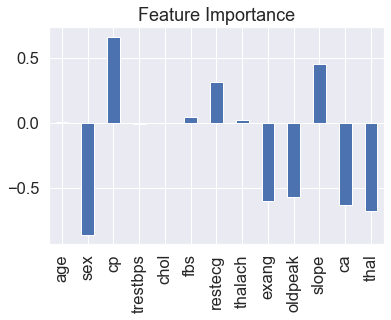

In [67]:
 # Make the feature importance dictionary into a dataframe
feature_df = pd.DataFrame(feature_dict, index = [0])
feature_df.T.plot.bar(title="Feature Importance", legend=False);

We notice that :-
1. Being male is strongly negatively correlated to heart disease occurences -> male's less likely to have heart disease.
2. Chest pains `cp` of higher types are positively correlated to heart disease occurences -> non-anginal and asymptotic chest pain = higher chances of heart disease  

## 6. Exporting the Model

In [68]:
from joblib import dump, load
# Save model to file
dump(logreg_clf, filename="models/grid_searchcv_logreg_model_2.joblib")

['models/grid_searchcv_logreg_model_2.joblib']